<a href="https://colab.research.google.com/github/rueshi1/oasis_internship/blob/main/project_1_proposal_level_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import io


In [ ]:
uploaded = files.upload()


Saving Housing.csv to Housing (1).csv


In [ ]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))


In [ ]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
print(df.columns)
print(df.info())
print(df.isnull().sum())
print(df.describe().T)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null 

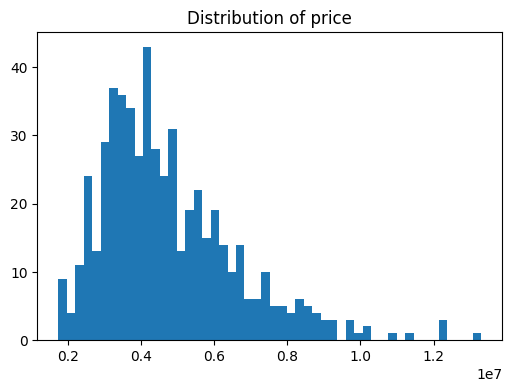

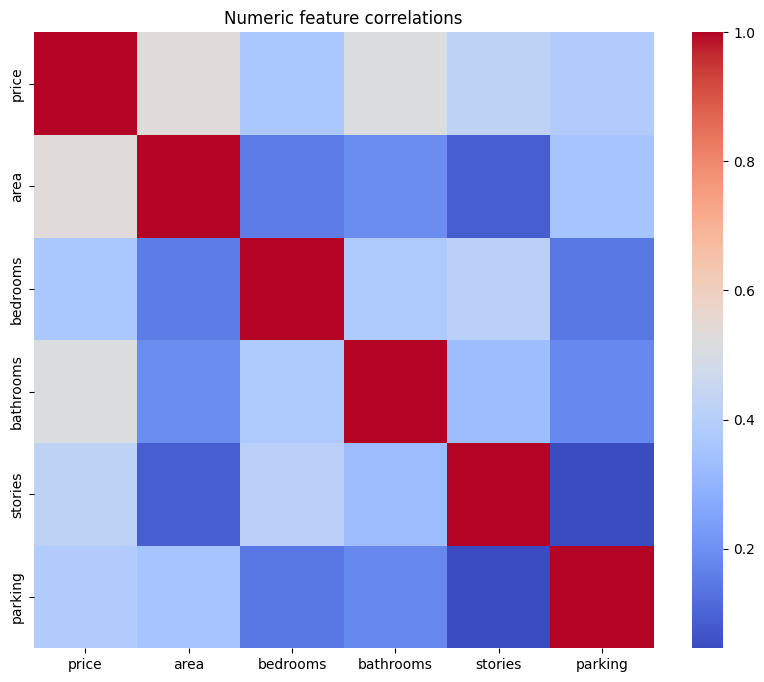

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# histogram of target (assume column 'Price' or 'SalePrice')
target = 'price'
plt.figure(figsize=(6,4))
plt.hist(df[target].dropna(), bins=50)
plt.title(f'Distribution of {target}')
plt.show()


# correlation heatmap for numeric features
num = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10,8))
sns.heatmap(num.corr(), annot=False, cmap='coolwarm')
plt.title('Numeric feature correlations')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# choose target
TARGET = target
X = df.drop(columns=[TARGET])
y = df[TARGET].copy()


# select numeric and categorical
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()


# Simple imputation and encoding
# Fill numeric NaNs with median
X[num_cols] = X[num_cols].fillna(X[num_cols].median())
# Fill categorical NaNs
X[cat_cols] = X[cat_cols].fillna('Missing')


# One-hot encode low-cardinality categorical features
# (If many categories, consider target encoding or frequency encoding)
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


# Align columns (in real pipelines keep track of training cols)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)


# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


model = LinearRegression()
model.fit(X_train_scaled, y_train)


preds = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
print('LinearRegression RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)

LinearRegression RMSE: 1324506.96009144
MAE: 970043.4039201642
R2: 0.6529242642153177


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso


params = {'alpha': [0.01, 0.1, 1, 10, 50, 100]}


ridge = GridSearchCV(Ridge(), params, cv=5, scoring='neg_root_mean_squared_error')
ridge.fit(X_train_scaled, y_train)
print('Best Ridge alpha:', ridge.best_params_, 'Best score:', ridge.best_score_)


lasso = GridSearchCV(Lasso(max_iter=5000), params, cv=5, scoring='neg_root_mean_squared_error')
lasso.fit(X_train_scaled, y_train)
print('Best Lasso alpha:', lasso.best_params_, 'Best score:', lasso.best_score_)

Best Ridge alpha: {'alpha': 50} Best score: -1019499.7695127145
Best Lasso alpha: {'alpha': 100} Best score: -1021771.5284454596


In [ ]:
coefs = pd.Series(model.coef_, index=X_train.columns)
top_pos = coefs.sort_values(ascending=False).head(20)
top_neg = coefs.sort_values().head(20)
print('Top positive features:\n', top_pos)
print('Top negative features:\n', top_neg)

Top positive features:
 bathrooms                          521879.027748
area                               519552.416340
airconditioning_yes                365157.393851
stories                            349251.438906
prefarea_yes                       266656.351993
parking                            192005.953667
basement_yes                       187067.803214
hotwaterheating_yes                149862.702991
mainroad_yes                       128498.628215
guestroom_yes                       88768.667686
bedrooms                            57349.559419
furnishingstatus_semi-furnished    -62837.321865
furnishingstatus_unfurnished      -192015.917982
dtype: float64
Top negative features:
 furnishingstatus_unfurnished      -192015.917982
furnishingstatus_semi-furnished    -62837.321865
bedrooms                            57349.559419
guestroom_yes                       88768.667686
mainroad_yes                       128498.628215
hotwaterheating_yes                149862.702991
baseme

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
print('CV RMSE mean:', -scores.mean(), 'std:', scores.std())

CV RMSE mean: 1021776.3704530786 std: 136428.92847973405


In [ ]:
import joblib
import os

# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(model, 'models/linreg_joblib.pkl')
joblib.dump(scaler, 'models/scaler_joblib.pkl')

['models/scaler_joblib.pkl']